## <font color="red"> ESERCIZIO 06
    
*Nota*: in questo esercizio l'eseguibile è chiamato `Monte_Carlo_ISING_1D.exe` e necessita ogni volta del file di input `input.dat`, già predisposto per l'esecuzione. Si consiglia prima di ogni run di eseguire lo script `clean_all.sh` perché i risultati non vengono sovrascritti ma aggiunti in fondo a quelli precedenti.

Nel resto del notebook sono sottintese le unità naturali $\mu_B=k_B=1$.

Per prima cosa completo il codice fornito introducendo nella funzione *Move* la possibilità di utilizzare l'algoritmo Metropolis o Gibbs per ottenere le nuove configurazioni. La scelta del metodo viene fatta nel file di input nell'apposita riga.

Ho poi aggiunto due funzioni *Save_spin* e *Load_spin* che rispettivamente salvano e caricano una data configurazione. Ho infine scritto le funzioni per stampare i risultati (al variare della temperatura) e calcolare le quantità richieste.

Per prima cosa effettuo un test a temperatura fissata ($T=2~\mathrm{K}$) per osservare il comportamento dei due algoritmi e delle grandezze richieste. Utilizzo i parametri forniti nel testo e utilizzo $10^5$ steps ripetuti per 100 blocks. Questi sono i risultati:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

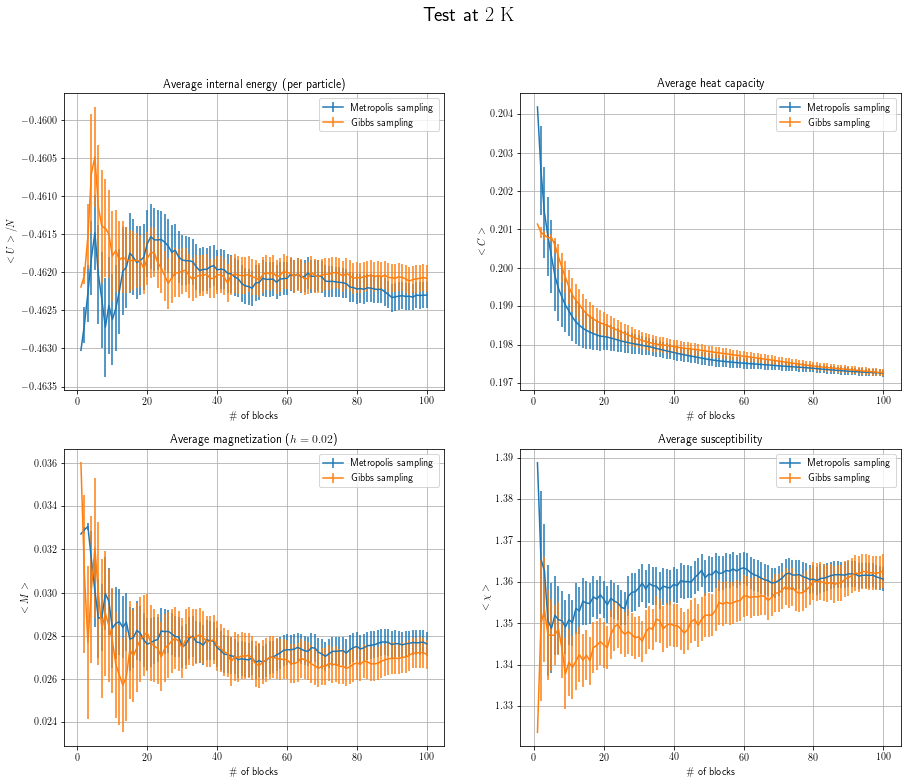

In [2]:
plt.rc('text', usetex=True)

plt.figure(figsize=(15,12))

plt.suptitle('Test at $2~\mathrm{K}$',fontsize=20)
plt.subplot(221)
plt.title('Average internal energy (per particle)')
bl, Em, errEm = np.loadtxt("2K_test/ene_ave.met", usecols=(0,2,3), delimiter='   ', unpack='true')
bl, Eg, errEg = np.loadtxt("2K_test/ene_ave.gib", usecols=(0,2,3), delimiter='   ', unpack='true')
plt.errorbar(bl, Em ,yerr=errEm, label='Metropolis sampling')
plt.errorbar(bl, Eg ,yerr=errEg, label='Gibbs sampling')

plt.xlabel('$\#$ of blocks')
plt.ylabel('$<U>/N$')
plt.grid(True)
plt.legend()

plt.subplot(222)
plt.title('Average heat capacity')
bl, cm, errcm = np.loadtxt("2K_test/heat_ave.met", usecols=(0,2,3), delimiter='   ', unpack='true')
bl, cg, errcg = np.loadtxt("2K_test/heat_ave.gib", usecols=(0,2,3), delimiter='   ', unpack='true')
plt.errorbar(bl, cm ,yerr=errcm, label='Metropolis sampling')
plt.errorbar(bl, cg ,yerr=errcg, label='Gibbs sampling')

plt.xlabel('$\#$ of blocks')
plt.ylabel('$<C>$')
plt.grid(True)
plt.legend()

plt.subplot(223)
plt.title('Average magnetization ($h=0.02$)')
bl, mm, errmm = np.loadtxt("2K_test/mag_ave.met", usecols=(0,2,3), delimiter='   ', unpack='true')
bl, mg, errmg = np.loadtxt("2K_test/mag_ave.gib", usecols=(0,2,3), delimiter='   ', unpack='true')
plt.errorbar(bl, mm ,yerr=errmm, label='Metropolis sampling')
plt.errorbar(bl, mg ,yerr=errmg, label='Gibbs sampling')

plt.xlabel('$\#$ of blocks')
plt.ylabel('$<M>$')
plt.grid(True)
plt.legend()

plt.subplot(224)
plt.title('Average susceptibility')
bl, xm, errxm = np.loadtxt("2K_test/chi_ave.met", usecols=(0,2,3), delimiter='   ', unpack='true')
bl, xg, errxg = np.loadtxt("2K_test/chi_ave.gib", usecols=(0,2,3), delimiter='   ', unpack='true')
plt.errorbar(bl, xm ,yerr=errxm, label='Metropolis sampling')
plt.errorbar(bl, xg ,yerr=errxg, label='Gibbs sampling')

plt.xlabel('$\#$ of blocks')
plt.ylabel('$<\chi>$')
plt.grid(True)
plt.legend()

plt.show()

Da questi grafici noto che il comportamento dei due algoritmi è simile, sia per quanto riguarda gli errori che per la convergenza. Noto che è necessaria una fase di equilibratura (che per questi dati non ho effettuato): scelgo di scartare i primi 40 blocks che corrispondono a $40\cdot10^5$ steps (la scelta viene fatta tramite l'apposita riga nel file di input).

Utilizzando le funzioni analitiche date nel testo, produco i seguenti grafici che rappresentano le grandezze misurate al variare della temperatura. Ho scelto come range l'intervallo $[0.5,2]~\mathrm{K}$ che è simile a quello proposto nel testo usando $\Delta T=0.05~\mathrm{K}$ (anche questi selezionabili nell'input). Per ogni temperatura equilibro il sistema (come detto sopra) e uso ogni volta la funzione *Load_spin* per caricare la configurazione iniziale, in modo da partire sempre con la stessa.

In [3]:
# Expected functions
points = 100
T = np.linspace(0.4,2.1, num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

# Internal energy (per particle)
e = -J*( th + ch*thN )/( 1 + thN )

# Heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Magnetization (h=0.02)
h=0.02 # external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

# Susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

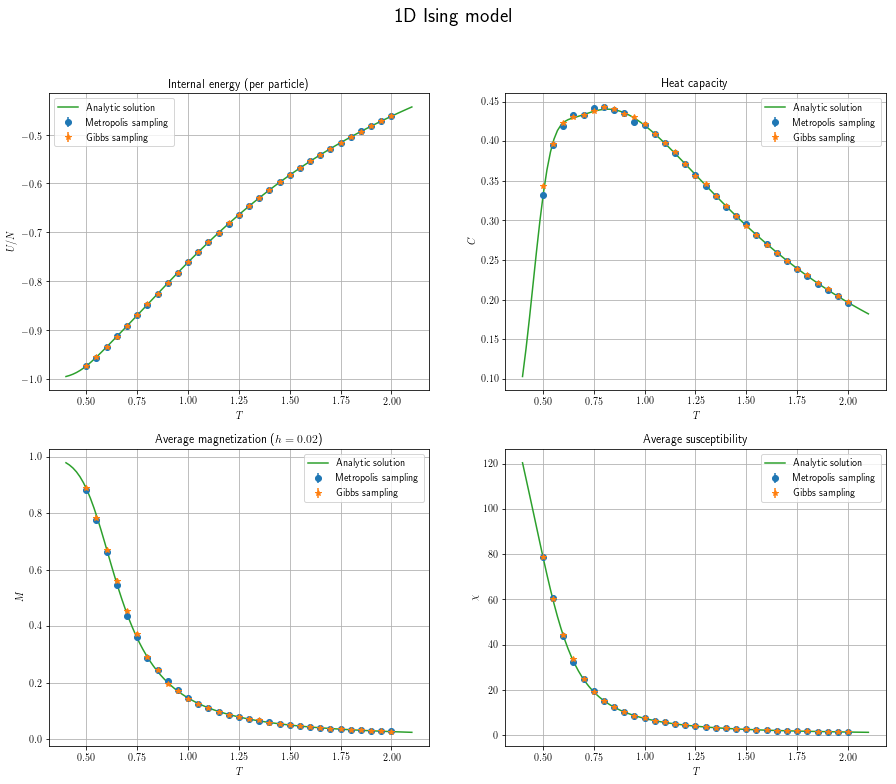

In [4]:
plt.figure(figsize=(15,12))

plt.suptitle('1D Ising model',fontsize=20)

plt.subplot(221)
plt.title('Internal energy (per particle)')
bl, E, errE = np.loadtxt("Risultati/ene.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, Eg, errEg = np.loadtxt("Risultati/ene.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, E ,yerr=errE, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, Eg ,yerr=errEg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, e, label = 'Analytic solution')

plt.xlabel('$T$')
plt.ylabel('$U/N$')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.title('Heat capacity')
bl, h, errh = np.loadtxt("Risultati/heat.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, hg, errhg = np.loadtxt("Risultati/heat.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, h ,yerr=errh, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, hg ,yerr=errhg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, heat, label = 'Analytic solution')

plt.xlabel('$T$')
plt.ylabel('$C$')
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.title('Average magnetization ($h=0.02$)')
bl, m, errm = np.loadtxt("Risultati/mag.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, mg, errmg = np.loadtxt("Risultati/mag.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, m ,yerr=errm, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, mg ,yerr=errmg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, M, label = 'Analytic solution')

plt.xlabel('$T$')
plt.ylabel('$M$')
plt.legend()
plt.grid(True)

plt.subplot(224)
plt.title('Average susceptibility')
bl, x, errx = np.loadtxt("Risultati/chi.met", usecols=(0,1,2), delimiter='   ', unpack='true')
blg, xg, errxg = np.loadtxt("Risultati/chi.gib", usecols=(0,1,2), delimiter='   ', unpack='true')
plt.errorbar(bl, x ,yerr=errx, fmt = 'o', label = 'Metropolis sampling')
plt.errorbar(blg, xg ,yerr=errxg, fmt = '*', label = 'Gibbs sampling')
plt.plot(T, X, label = 'Analytic solution')

plt.xlabel('$T$')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)

plt.show()

Osservo che i due algoritmi fittano in maniera perfetta la soluzione analitica in questo intervallo. Inoltre osservo che i valori di convergenza del test paiono plausibili da un rapido confronto visivo.